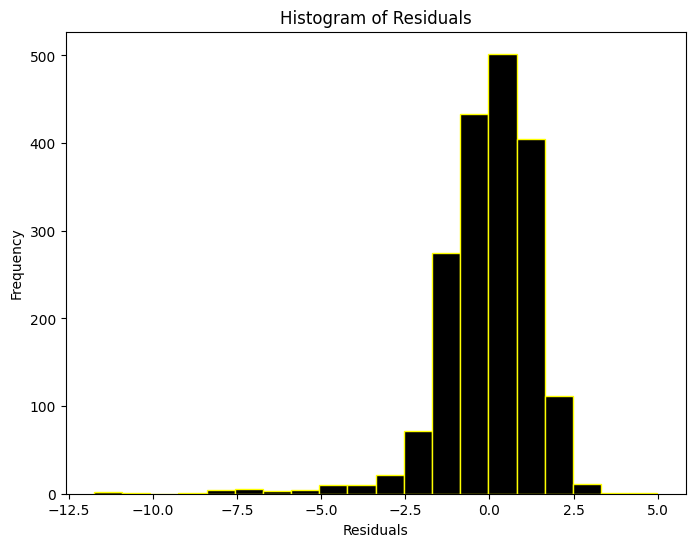

                        id          created_at  \
2       994363623421153280 2018-05-09 23:48:56   
7       993889039714578432 2018-05-08 16:23:07   
8       993629544463642624 2018-05-07 23:11:58   
24      992198572664860672 2018-05-04 00:25:48   
30      991744041351090177 2018-05-02 18:19:39   
...                    ...                 ...   
11631  1096203765189726208 2019-02-15 00:25:18   
11638  1095730341828915200 2019-02-13 17:04:05   
11665  1093636946046242817 2019-02-07 22:25:41   
11666  1093636812818472960 2019-02-07 22:25:09   
11672  1093315910369107968 2019-02-07 01:10:00   

                                                    text  ratings  \
2      This is Louie. He has misplaced his Cheerio. W...     14.0   
7      This is Manny. He hasn’t seen your croissant. ...     13.0   
8      This is Libby. She leap. 14/10\n(IG: libbythef...     14.0   
24     This is Rosie. She thought Coachella was this ...     13.0   
30     This is Riley. He’ll be your chauffeur this ev.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def to_timestamp(date):
    return date.timestamp()
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])
rating_pattern = r'(\d+(\.\d+)?)\/10'
data['ratings'] = data['text'].str.extract(rating_pattern, expand=True)[0]
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
filtered_data = data[(data['ratings'].notna()) & (data['ratings'] < 26)].copy()
# plt.figure(figsize=(10, 5))
# plt.scatter(filtered_data['created_at'], filtered_data['ratings'], alpha=0.5)
# plt.xticks(rotation=25)
# plt.xlabel('Date of Tweet')
# plt.ylabel('Rating')
# plt.title('Scatter plot of Date vs Rating')
# plt.show()


filtered_data.loc[:, 'timestamp'] = filtered_data['created_at'].apply(to_timestamp)
regValues = stats.linregress(filtered_data['timestamp'], filtered_data['ratings'])
filtered_data['prediction'] = regValues.slope*filtered_data['timestamp'] + regValues.intercept


residuals=filtered_data['ratings']-filtered_data['prediction']
plt.figure(figsize=(8,6))
plt.hist(residuals,bins=20,edgecolor='yellow',color='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

print(filtered_data)
print("\nSlope:", regValues.slope)
print("Intercept:", regValues.intercept)
print('p-value:: ',regValues.pvalue)

# Plot the best-fit line
# plt.figure(figsize=(10, 5))
# plt.xticks(rotation=25)
# plt.plot(filtered_data['created_at'], filtered_data['ratings'], 'b.', alpha=0.5)
# plt.plot(filtered_data['created_at'], regValues.slope*filtered_data['timestamp'] + regValues.intercept, 'r-', linewidth=3)
# plt.xlabel('Tweet made at this day:')
# plt.ylabel("Rating of the tweet:")
# plt.show()
